In [513]:
# Import some important libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_rows',1000)
pd.set_option('max_columns',500)

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [514]:
# lets load the csv file
bike_sharing = pd.read_csv('day.csv')

In [515]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [516]:
bike_sharing.shape

(730, 16)

In [517]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [518]:
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [519]:
# lets drop some unwanted columns
drop_cols=['instant','dteday','casual','registered']
bike_sharing.drop(drop_cols,axis=1,inplace=True)

In [520]:
bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


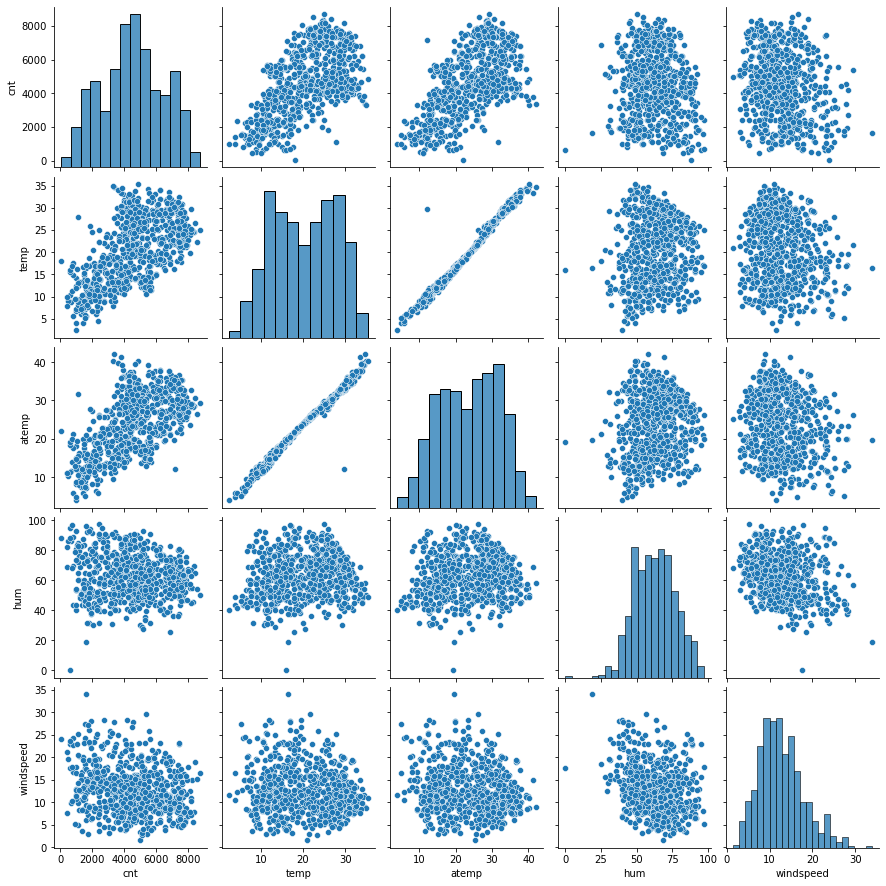

In [521]:
# lets plot a pair plot between numerical variables
num_vars = ['cnt','temp','atemp','hum','windspeed']
sns.pairplot(data=bike_sharing[num_vars])
plt.show()

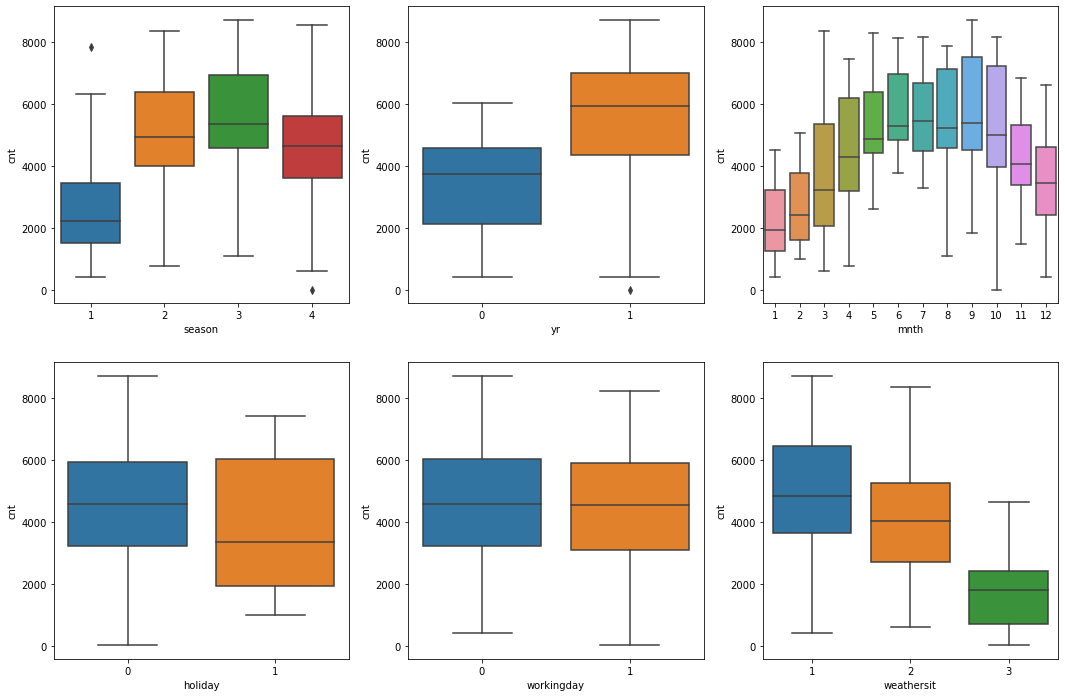

In [522]:
# lets plot box plots for categorical variables
plt.figure(figsize=[18,12])
plt.subplot(2,3,1)
sns.boxplot(data=bike_sharing,x='season',y='cnt')
plt.subplot(2,3,2)
sns.boxplot(data=bike_sharing,x='yr',y='cnt')
plt.subplot(2,3,3)
sns.boxplot(data=bike_sharing,x='mnth',y='cnt')
plt.subplot(2,3,4)
sns.boxplot(data=bike_sharing,x='holiday',y='cnt')
plt.subplot(2,3,5)
sns.boxplot(data=bike_sharing,x='workingday',y='cnt')
plt.subplot(2,3,6)
sns.boxplot(data=bike_sharing,x='weathersit',y='cnt')
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

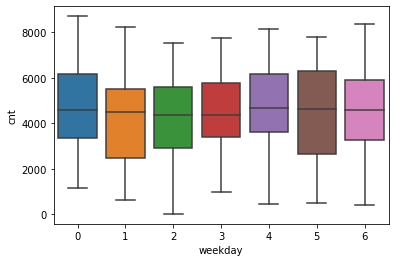

In [523]:
sns.boxplot(data=bike_sharing,x='weekday',y='cnt')

In [524]:
# lets convert 'season' column values
bike_sharing['season'] = bike_sharing['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [525]:
# lets convert 'weathersit' column values
bike_sharing['weathersit'] = bike_sharing['weathersit'].map({1:'Clear',2:'Cloudy',3:'Rain'})

In [526]:
# lets convert 'mnth' column values
bike_sharing['mnth'] = bike_sharing['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
                                                 10:'Oct',11:'Nov',12:'Dec'})

In [527]:
# lets convert 'weekday' column values
bike_sharing['weekday'] = bike_sharing['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thr',5:'Fri',6:'Sat'})

In [528]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thr,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [529]:
# lets create dummy variable for season column
season = pd.get_dummies(bike_sharing['season'],drop_first=True)

In [530]:
# lets merge the dataframe with bike_sahring dataframe
bike_sharing = pd.concat([bike_sharing,season],axis=1)

In [531]:
 # lets create dummy variable for weathersit column
weathersit = pd.get_dummies(bike_sharing['weathersit'],drop_first=True)

In [532]:
# lets merge the dataframe with bike_sahring dataframe
bike_sharing = pd.concat([bike_sharing,weathersit],axis=1)

In [533]:
 # lets create dummy variable for mnth column
mnth = pd.get_dummies(bike_sharing['mnth'],drop_first=True)

In [534]:
# lets merge the dataframe with bike_sahring dataframe
bike_sharing = pd.concat([bike_sharing,mnth],axis=1)

In [535]:
 # lets create dummy variable for weekday column
weekday = pd.get_dummies(bike_sharing['weekday'],drop_first=True)

In [536]:
# lets merge the dataframe with bike_sahring dataframe
bike_sharing = pd.concat([bike_sharing,weekday],axis=1)

In [537]:
# lets drop the columns those are converted in to dummy variables
bike_sharing.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [538]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [539]:
bike_sharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.336986,0.028767,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.473004,0.167266,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [540]:
# lets split the data set in to train and test data set
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing, train_size=0.70, random_state=100)

In [541]:
bike_sharing_train.shape

(510, 30)

In [542]:
bike_sharing_test.shape

(220, 30)

In [543]:
# Lets scale the train data set (we use MinMaxScaler)
num_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler = MinMaxScaler()
bike_sharing_train[num_vars] = scaler.fit_transform(bike_sharing_train[num_vars])

In [544]:
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [545]:
bike_sharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.345098,0.029412,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.475867,0.169124,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


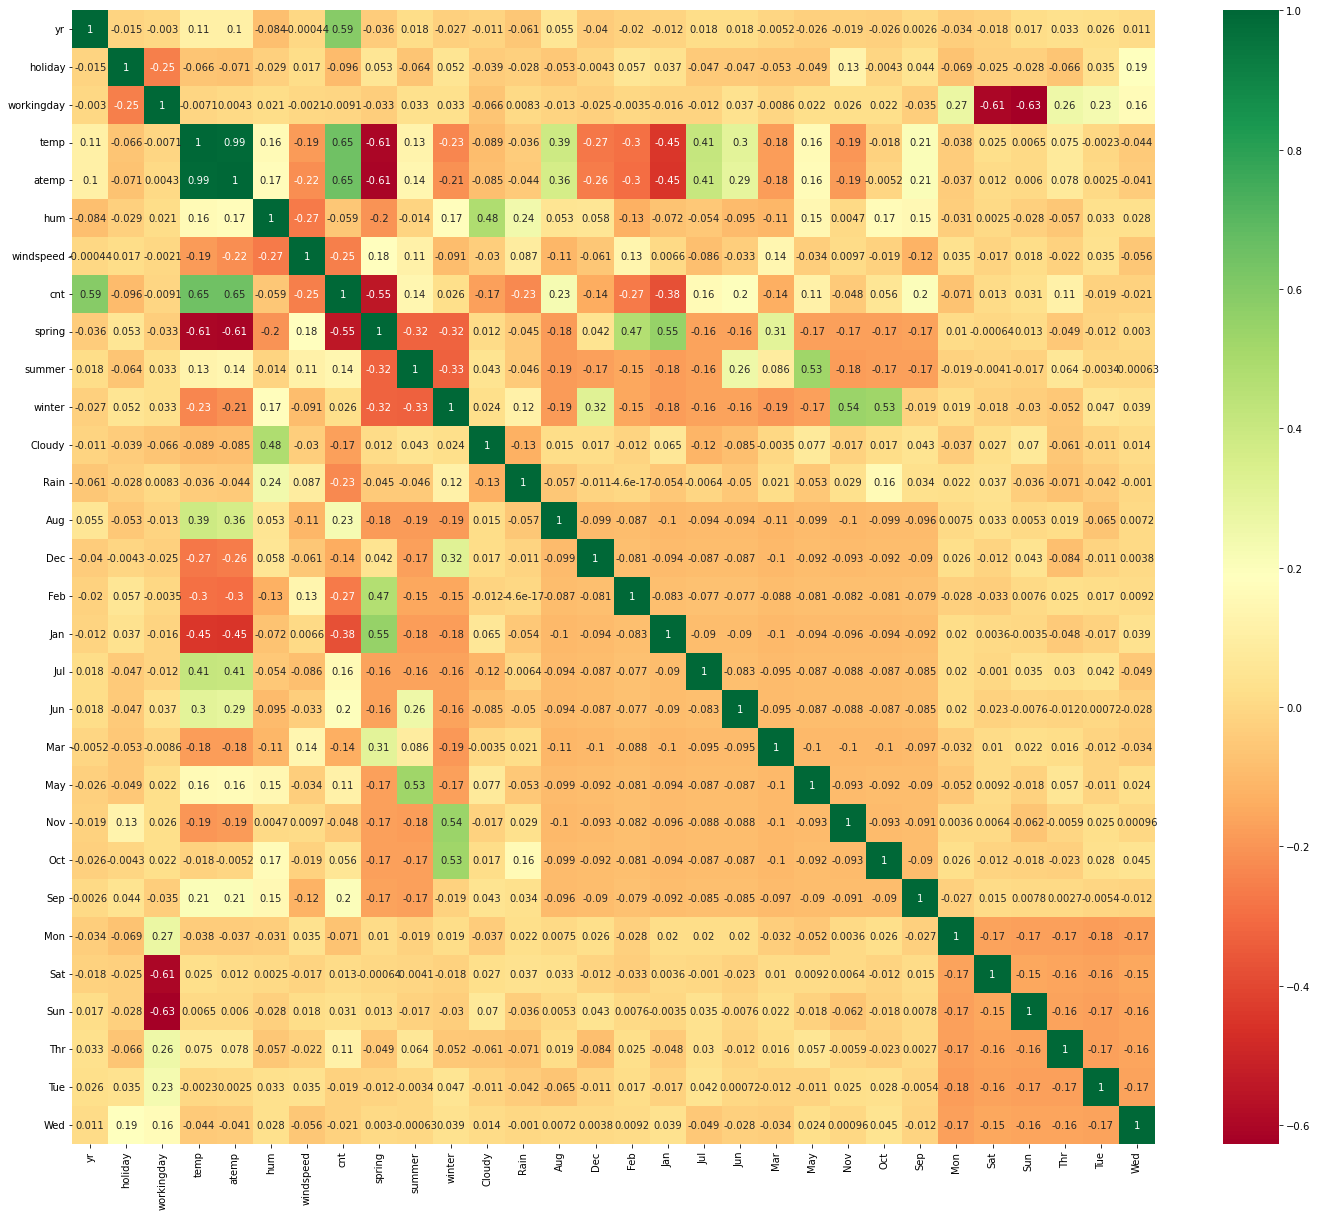

In [546]:
# lets check the correlation between the variables
plt.figure(figsize=[20,17])
sns.heatmap(bike_sharing_train.corr(), cmap='RdYlGn', annot=True)
plt.tight_layout()
plt.show()

In [547]:
# lets create y_train, x_train
y_train = bike_sharing_train.pop('cnt')
x_train = bike_sharing_train

In [548]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [549]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Cloudy,Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [550]:
# RFE(Recursive feature elimination)
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [551]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Cloudy', True, 1),
 ('Rain', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thr', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11)]

In [552]:
# selecting the selected variable via RFE in col list

col = x_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Cloudy', 'Rain', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')


In [553]:
# checking which columns has been rejected

x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thr', 'Tue', 'Wed'],
      dtype='object')

In [554]:
# dataframe with RFE selected variables

x_train_rfe = x_train[col]

In [555]:
# lets create the model
x_train_sm = sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train,x_train_sm)
lr_model = lr.fit()

In [556]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        21:25:14   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
Cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
Rain          -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep            0.0755      0.017      4.466      0.000       0.042       0.109
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [557]:
# lets calculate the VIF value
VIF = pd.DataFrame()
VIF['features'] = x_train_rfe.columns
VIF['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF.sort_values(by='VIF',ascending=False)

,features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
8,Cloudy,2.32
0,yr,2.09
13,Nov,1.85
11,Jan,1.75


In [558]:
# lets drop the 'hum' column, because it has high VIF value
x = x_train_rfe.drop('hum',axis=1)

In [559]:
# lets create the model again
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train,x_train_sm)
lr_model = lr.fit()

In [560]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          4.75e-186
Time:                        21:25:15   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
Cloudy        -0.0801      0.009     -9.198      0.000      -0.097      -0.063
Rain          -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Jul           -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep            0.0687      0.017      4.015      0.000       0.035       0.102
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [561]:
# lets calculate the VIF value again
VIF = pd.DataFrame()
VIF['features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF.sort_values(by='VIF',ascending=False)

,features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
12,Nov,1.81
10,Jan,1.66
11,Jul,1.59
7,Cloudy,1.57


In [562]:
# lets drop the 'Nov' variable, because it has high p-value
x = x.drop('Nov',axis=1)

In [563]:
# lets create the model again
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train,x_train_sm)
lr_model = lr.fit()

In [564]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          2.74e-186
Time:                        21:25:15   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

In [565]:
# lets calculate the VIF value again
VIF = pd.DataFrame()
VIF['features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF.sort_values(by='VIF',ascending=False)

,features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
10,Jan,1.65
11,Jul,1.59
7,Cloudy,1.57
12,Sep,1.34


In [566]:
# lets drop the 'Dec' variable, because it has high p-value
x = x.drop('Dec',axis=1)

In [567]:
# lets create the model again
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train,x_train_sm)
lr_model = lr.fit()

In [568]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          8.14e-187
Time:                        21:25:16   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [569]:
# lets calculate the VIF value again
VIF = pd.DataFrame()
VIF['features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF.sort_values(by='VIF',ascending=False)

,features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
9,Jan,1.61
10,Jul,1.59
7,Cloudy,1.56
11,Sep,1.34


In [570]:
# lets drop the 'Jan' variable, because it has high p-value
x = x.drop('Jan',axis=1)

In [571]:
# lets create the model again
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train,x_train_sm)
lr_model = lr.fit()

In [572]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          5.06e-187
Time:                        21:25:16   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [573]:
# lets calculate the VIF value again
VIF = pd.DataFrame()
VIF['features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF.sort_values(by='VIF',ascending=False)

,features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
9,Jul,1.58
7,Cloudy,1.55
10,Sep,1.34
8,Rain,1.08


In [574]:
# lets drop the 'Jul' variable, because it has high p-value
x = x.drop('Jul',axis=1)

In [575]:
# lets create the model again
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train,x_train_sm)
lr_model = lr.fit()

In [576]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 28 Aug 2022   Prob (F-statistic):          1.47e-186
Time:                        21:25:16   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

In [577]:
# lets calculate the VIF value again
VIF = pd.DataFrame()
VIF['features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF.sort_values(by='VIF',ascending=False)

,features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
7,Cloudy,1.55
9,Sep,1.23
8,Rain,1.08
1,holiday,1.04


In [578]:
y_train_pred = lr_model.predict(x_train_sm)

In [579]:
rss = y_train - y_train_pred

In [580]:
rss

576    0.052435
426    0.000884
728   -0.184374
482   -0.086460
111   -0.091885
580   -0.010985
500    0.046264
479   -0.000954
472   -0.109061
455    0.107240
636    0.142501
224    0.043594
458    0.007762
244    0.021507
627    0.103589
595   -0.154668
140    0.113879
454    0.155496
162   -0.080773
231    0.043611
688    0.030262
659    0.047490
696   -0.004589
320    0.057685
534   -0.045286
136    0.073307
568   -0.001708
474    0.105039
206   -0.039185
427   -0.044012
288    0.098934
447   -0.238931
259    0.102779
174    0.042155
267   -0.063466
327   -0.166791
402   -0.010951
590   -0.004015
609   -0.143928
704    0.021467
376    0.029633
365   -0.245532
15    -0.055645
656   -0.089876
639    0.000027
470    0.056628
561   -0.022132
680    0.083823
591    0.072858
240    0.033367
597    0.036972
718   -0.100873
115    0.000412
565    0.018459
154    0.042058
471    0.026913
241    0.086371
552   -0.309817
651    0.041708
384    0.027335
315    0.056969
484    0.030262
354    0

<AxesSubplot:ylabel='Density'>

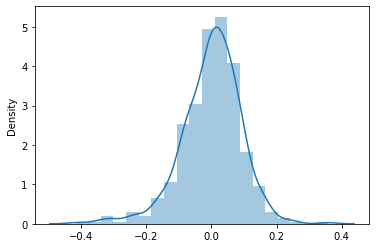

In [581]:
sns.distplot(rss, bins=20)

### Prediction and Evaluation on the test set  

In [582]:
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [583]:
# scale the test data
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_sharing_test[num_vars] = scaler.transform(bike_sharing_test[num_vars])

In [584]:
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Cloudy,Rain,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thr,Tue,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [585]:
y_test = bike_sharing_test.pop('cnt')
x_test = bike_sharing_test

In [593]:
col1 = x.columns

In [595]:
x_test = x_test[col1]

In [596]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [597]:
x_test.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Cloudy,Rain,Sep
184,0,1,0.831783,0.084219,0,0,0,1,0,0
535,1,0,0.901354,0.153728,0,1,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,1,0,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0


In [598]:
x_test_sm = sm.add_constant(x_test)

In [599]:
x_test_sm.head()

,const,yr,holiday,temp,windspeed,spring,summer,winter,Cloudy,Rain,Sep
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


In [600]:
y_test_pred = lr_model.predict(x_test_sm)

In [601]:
y_test_pred.head()

184    0.400699
535    0.894906
299    0.401679
221    0.561750
152    0.563769
dtype: float64

In [602]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8038195990728842

## We get the r2_score = 0.80 